# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
#Observable trends
print("From this data, we can conclude the following:")
print("1. Those cities located between 0 degrees and 40 degrees latitude have the highest max temperature on average")
print("2. International average windspeeds are between 0 and 10 mph")
print("3. Regression analysis shows that there is little relationship between geolocation and cloudiness, humidity, or windspeed in the Northern and Southern Hemispheres.")

From this data, we can conclude the following:
1. Those cities located between 0 degrees and 40 degrees latitude have the highest max temperature on average
2. International average windspeeds are between 0 and 10 mph
3. Regression analysis shows that there is little relationship between geolocation and cloudiness, humidity, or windspeed in the Northern and Southern Hemispheres.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Pulling Cities list using API
units = 'Imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url +"units=" + units + "&appid=" + weather_api_key + "&q="

x=1
count=1
city_name=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

#Looping through cities and adding them to lists defined above

print("Beginning Data Retrieval")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data = requests.get(query_url + city).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found. Skipping... ")
        
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Data Retrieval Complete ")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Beginning Data Retrieval
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Processing Record 1 of set 1|barrow
Processing Record 2 of set 1|mataura
Processing Record 3 of set 1|busselton
Processing Record 4 of set 1|namatanai
Processing Record 5 of set 1|rikitea
Processing Record 6 of set 1|ushuaia
Processing Record 7 of set 1|punta arenas
Processing Record 8 of set 1|ranong
Processing Record 9 of set 1|ugoofaaru
Processing Record 10 of set 1|bulnes
Processing Record 11 of set 1|tuktoyaktuk
Processing Record 12 of set 1|hobart
Processing Record 13 of set 1|yar-sale
Processing Record 14 of set 1|beringovskiy
Processing Record 15 of set 1|chuy
Processing Record 16 of set 1|phan thiet
Processing Record 17 of set 1|namibe
Processing Record 18 of set 1|ahipara
Processing Record 19 of set 1|los llanos de aridane
Processing Record 20 of set 1|morgantown
Processing Record 21 of set 1|faya
Processing Record 22 of set 1|kindu
Processing Record 23 of set 1|rupert
Processing Record 24 of set 1|yumen
Processing Record 

Processing Record 45 of set 4|codrington
Processing Record 46 of set 4|savannah bight
Processing Record 47 of set 4|moerai
Processing Record 48 of set 4|vestmannaeyjar
Processing Record 49 of set 4|aswan
Processing Record 50 of set 4|biak
Processing Record 1 of set 5|marabba
City not found. Skipping... 
Processing Record 2 of set 5|severo-kurilsk
Processing Record 3 of set 5|san cristobal
Processing Record 4 of set 5|vagay
Processing Record 5 of set 5|mnogovershinnyy
Processing Record 6 of set 5|vanimo
Processing Record 7 of set 5|walvis bay
City not found. Skipping... 
Processing Record 8 of set 5|esmeraldas
Processing Record 9 of set 5|takoradi
Processing Record 10 of set 5|mogok
Processing Record 11 of set 5|khatanga
Processing Record 12 of set 5|ancud
Processing Record 13 of set 5|gizo
Processing Record 14 of set 5|bezenchuk
Processing Record 15 of set 5|cikupa
Processing Record 16 of set 5|trinidad
Processing Record 17 of set 5|pevek
Processing Record 18 of set 5|rumuruti
Processi

Processing Record 45 of set 8|stepnogorsk
Processing Record 46 of set 8|krasnoselkup
Processing Record 47 of set 8|mollendo
Processing Record 48 of set 8|isla mujeres
Processing Record 49 of set 8|salinopolis
Processing Record 50 of set 8|fortuna
Processing Record 1 of set 9|durres
Processing Record 2 of set 9|mbuji-mayi
Processing Record 3 of set 9|laguna
Processing Record 4 of set 9|fare
Processing Record 5 of set 9|ponta do sol
Processing Record 6 of set 9|esperance
Processing Record 7 of set 9|ko samui
Processing Record 8 of set 9|cache creek
Processing Record 9 of set 9|skibbereen
Processing Record 10 of set 9|panjakent
Processing Record 11 of set 9|sao sebastiao
Processing Record 12 of set 9|xifeng
Processing Record 13 of set 9|bethel
Processing Record 14 of set 9|fujin
Processing Record 15 of set 9|governador dix-sept rosado
Processing Record 16 of set 9|fort collins
Processing Record 17 of set 9|port-gentil
Processing Record 18 of set 9|oktyabrskoye
Processing Record 19 of set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dataframe using inputs from previous loop and export to csv
cityweather_df = pd.DataFrame({"City":city_name,"Latitude":lat,"Longitute":long,"Max Temperature":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,"Wind Speed":Wind_Speed,"Country":Country, "Date":Date})
cityweather_df.to_csv(output_data_file,index=False,header=True)
cityweather_df

,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,42.82,91,90,19.57,US,1627439584
1,Mataura,-46.1927,168.8643,51.48,79,79,1.45,NZ,1627439811
2,Busselton,-33.6500,115.3333,58.05,68,46,19.93,AU,1627439812
3,Namatanai,-3.6667,152.4333,84.83,67,25,4.99,PG,1627439812
4,Rikitea,-23.1203,-134.9692,74.21,79,100,15.30,PF,1627439614
...,...,...,...,...,...,...,...,...,...
565,Bairnsdale,-37.8333,147.6167,67.06,47,32,4.00,AU,1627439951
566,Kanye,-24.9667,25.3327,40.35,57,0,5.03,BW,1627439952
567,Hvolsvollur,63.7533,-20.2243,47.80,88,57,4.61,IS,1627439952
568,Skagen,57.7209,10.5839,62.28,91,99,11.95,DK,1627439952


In [5]:
#dataframe review
cityweather_df.describe()

,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,21.063715,13.242715,69.172316,70.557895,52.436842,7.519877,1.627440e+09
std,33.381392,89.930306,13.823418,19.756274,40.335287,5.619824,1.026939e+02
min,-54.800000,-175.200000,33.730000,12.000000,0.000000,0.000000,1.627440e+09
25%,-6.278325,-65.682925,59.727500,58.250000,6.000000,3.295000,1.627440e+09
50%,26.175450,17.817600,71.365000,75.000000,60.500000,6.300000,1.627440e+09
75%,49.524950,89.764375,80.005000,86.000000,94.750000,10.337500,1.627440e+09
max,78.218600,179.316700,99.210000,100.000000,100.000000,29.930000,1.627440e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#create dataframe to insure no humidity values over 100%
humidcityweather_df = cityweather_df[cityweather_df["Humidity"] > 100]
humidcityweather_df

,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%. No cities to note.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = cityweather_df.drop(cityweather_df[cityweather_df['Humidity'] > 100].index, inplace = False)

clean_city_data


,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,42.82,91,90,19.57,US,1627439584
1,Mataura,-46.1927,168.8643,51.48,79,79,1.45,NZ,1627439811
2,Busselton,-33.6500,115.3333,58.05,68,46,19.93,AU,1627439812
3,Namatanai,-3.6667,152.4333,84.83,67,25,4.99,PG,1627439812
4,Rikitea,-23.1203,-134.9692,74.21,79,100,15.30,PF,1627439614
...,...,...,...,...,...,...,...,...,...
565,Bairnsdale,-37.8333,147.6167,67.06,47,32,4.00,AU,1627439951
566,Kanye,-24.9667,25.3327,40.35,57,0,5.03,BW,1627439952
567,Hvolsvollur,63.7533,-20.2243,47.80,88,57,4.61,IS,1627439952
568,Skagen,57.7209,10.5839,62.28,91,99,11.95,DK,1627439952


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

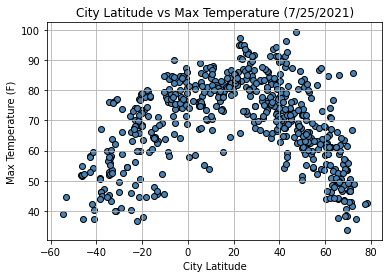

In [10]:
latit = clean_city_data["Latitude"]
Max_temp = clean_city_data["Max Temperature"]
lattempoutput = '../output_data/TempvsLat.png'
plt.scatter(latit, Max_temp, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()

plt.title (f"City Latitude vs Max Temperature (7/25/2021)")
plt.xlabel ("City Latitude")
plt.ylabel ("Max Temperature (F)")
plt.savefig (lattempoutput)
plt.show()

## Latitude vs. Humidity Plot

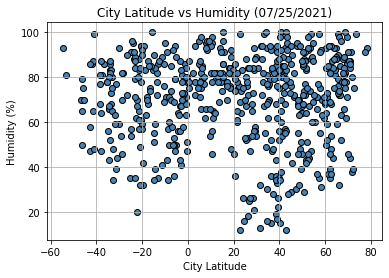

In [11]:
humidity = clean_city_data["Humidity"]
lathumoutput = '../output_data/LatvsHum.png'
plt.scatter(latit, humidity, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Humidity (07/25/2021)")
plt.xlabel ("City Latitude")
plt.ylabel ("Humidity (%)")
plt.savefig (lathumoutput)
plt.show()

## Latitude vs. Cloudiness Plot

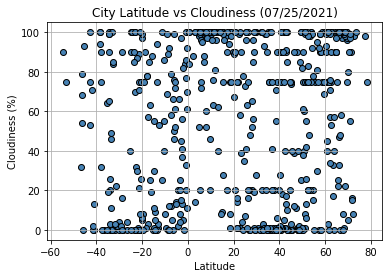

In [12]:
cloudiness = clean_city_data["Cloudiness"]
cloudlatoutput = '../output_data/LatvsCloud.png'
plt.scatter(latit, cloudiness, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Cloudiness (07/25/2021)")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.savefig (cloudlatoutput)
plt.show()

## Latitude vs. Wind Speed Plot

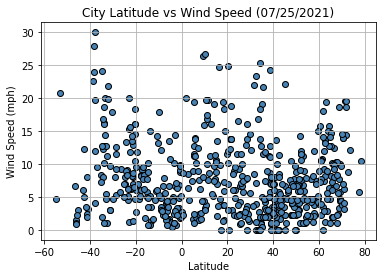

In [13]:
wind = clean_city_data["Wind Speed"]
latwindoutput = '../output_data/LatvsWind.png'

plt.scatter(latit, wind, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Wind Speed (07/25/2021)")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (mph)")
plt.savefig (latwindoutput)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4188066250964289


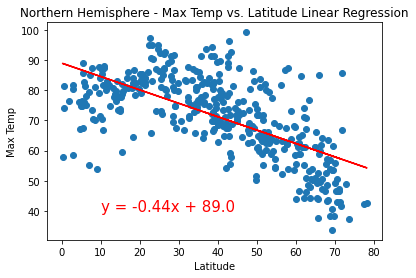

In [14]:
northhem_df = clean_city_data[clean_city_data["Latitude"]>0]

x_values = northhem_df['Latitude']
y_values = northhem_df['Max Temperature']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (10,40), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.title ("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.465320084301482


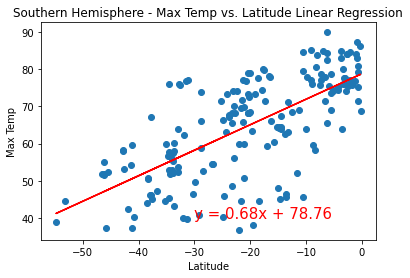

In [15]:
southhem_df = clean_city_data[clean_city_data["Latitude"]<0]

x_values = southhem_df['Latitude']
y_values = southhem_df['Max Temperature']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-30,40), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.title ("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0011585255692986816


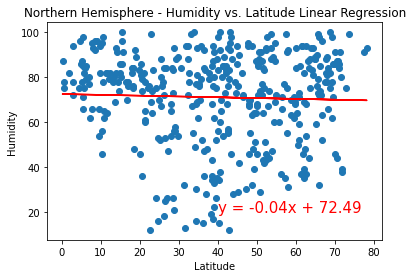

In [16]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Humidity']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.title ("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0048049625894286685


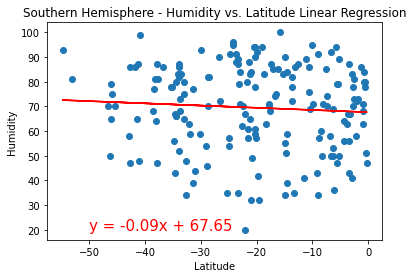

In [17]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Humidity']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-50,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.title ("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0030862462890086533


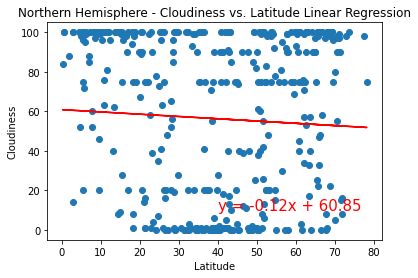

In [18]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,10), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.title ("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.001995829835524069


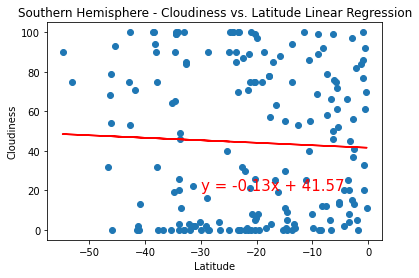

In [19]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-30,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.title ("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.006960895479655343


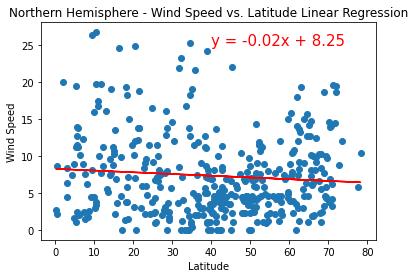

In [20]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,25), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.title ("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10002685410388867


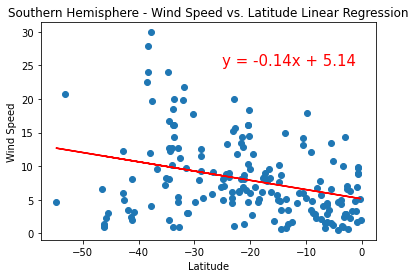

In [21]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-25,25), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.title ("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()